# Step1: Data Preparation

In [1]:
# Import necessary libraries
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\15810\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\15810\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# Load the data
with open('guangzhou_content.txt', 'r', encoding='utf-8') as file:
    articles = file.readlines()

In [3]:
# Tokenize, remove stopwords, and convert to lowercase
stop_words = set(stopwords.words('english'))
tokenized_articles = [word_tokenize(article) for article in articles]
cleaned_articles = [[word.lower() for word in article if word.isalpha() and word not in stop_words] for article in
                    tokenized_articles]

# Preview first 5 cleaned articles
cleaned_articles[:5]

[['the',
  'finals',
  'shanghai',
  'international',
  'youth',
  'piano',
  'competition',
  'held',
  'aug',
  'drew',
  'nearly',
  'contestants',
  'selected',
  'tens',
  'thousands',
  'children',
  'adolescents',
  'administrative',
  'regions',
  'organizers',
  'number',
  'participants',
  'taking',
  'part',
  'finals',
  'year',
  'record',
  'high',
  'indicates',
  'love',
  'keyboard',
  'instrument',
  'still',
  'going',
  'strong',
  'piano',
  'lessons',
  'one',
  'common',
  'forms',
  'extracurricular',
  'activities',
  'chinese',
  'parents',
  'plan',
  'children',
  'while',
  'may',
  'argue',
  'many',
  'children',
  'choice',
  'attending',
  'lessons',
  'taking',
  'part',
  'competition',
  'personally',
  'attest',
  'much',
  'love',
  'person',
  'wei',
  'changyou',
  'luohe',
  'city',
  'henan',
  'province',
  'the',
  'started',
  'learning',
  'piano',
  'age',
  'says',
  'heart',
  'overflows',
  'pleasant',
  'feelings',
  'listens',
  'bea

# Step2: Define Keywords

In [4]:
female_words = ['woman', 'women', 'female', 'girl', 'girls', 'lady', 'ladies', 'daughter', 'sister', 'mother', 'wife']
male_words = ['man', 'men', 'male', 'boy', 'boys', 'gentleman', 'gentlemen', 'son', 'brother', 'father', 'husband']
job_words = ['engineer', 'doctor', 'nurse', 'teacher', 'manager', 'worker', 'officer', 'chef', 'driver', 'journalist']

# Step3: Calculate Semantic Distance

In [6]:
from gensim.models import KeyedVectors

In [13]:
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)
def average_similarity_word2vec(word, word_list, model):
    similarities = []          
# Ensure the main word is in the model's vocabulary 
    if word not in model.key_to_index:       
        return 0.0         
    for w in word_list:         
# Only compute similarity if the secondary word is also in the model's vocabulary   
        if w in model.key_to_index:           
            similarity = model.similarity(word, w)      
            similarities.append(similarity)          
    # If no similarities were computed, return 0.0     
    if not similarities:         
        return 0.0         
        # Otherwise, return the average similarity 
    return sum(similarities) / len(similarities)  
        # Recompute the average similarities using the refined function 
female_similarities = {job: average_similarity_word2vec(job, female_words, model) for job in job_words} 
male_similarities = {job: average_similarity_word2vec(job, male_words, model) for job in job_words}  
female_similarities, male_similarities

({'engineer': 0.04442935284565796,
  'doctor': 0.2599344023249366,
  'nurse': 0.33506500043652276,
  'teacher': 0.26876568320122635,
  'manager': 0.052751941521736706,
  'worker': 0.23995340141383084,
  'officer': 0.10836776155470447,
  'chef': 0.12439668444990688,
  'driver': 0.18715927851471034,
  'journalist': 0.19766382331197913},
 {'engineer': 0.11833999094299295,
  'doctor': 0.25123278999870474,
  'nurse': 0.20287424393675543,
  'teacher': 0.2006505856459791,
  'manager': 0.06517823641611771,
  'worker': 0.20333594625646417,
  'officer': 0.15253144638104874,
  'chef': 0.13922278142788194,
  'driver': 0.21868321976878427,
  'journalist': 0.18804568594152277})

# Step 4: Statistical Analysis

In [15]:
import pandas as pd 
from scipy.stats import ttest_rel  
# Assuming df is your DataFrame with the similarity scores 
df = pd.DataFrame({
    'Job': list(female_similarities.keys()),     
    'Female Similarity': list(female_similarities.values()),     
    'Male Similarity': list(male_similarities.values()) 
})  
# Descriptive Statistics for Female Similarity Scores 
female_mean = df['Female Similarity'].mean() 
female_median = df['Female Similarity'].median() 
female_std = df['Female Similarity'].std()  
# Descriptive Statistics for Male Similarity Scores 
male_mean = df['Male Similarity'].mean() 
male_median = df['Male Similarity'].median() 
male_std = df['Male Similarity'].std()  
print(f"Female Similarity - Mean: {female_mean}, Median: {female_median}, Standard Deviation: {female_std}") 
print(f"Male Similarity - Mean: {male_mean}, Median: {male_median}, Standard Deviation: {male_std}")  
# Inferential Statistics: Paired t-test 
t_stat, p_value = ttest_rel(df['Female Similarity'], df['Male Similarity']) 
print(f"t-statistic: {t_stat}, p-value: {p_value}")

Female Similarity - Mean: 0.1818487329575212, Median: 0.19241155091334472, Standard Deviation: 0.09720075600942808
Male Similarity - Mean: 0.1740094926716252, Median: 0.19434813579375093, Standard Deviation: 0.054948374111159465
t-statistic: 0.4171107766924452, p-value: 0.6863708067593893


# Step 5: Visualization

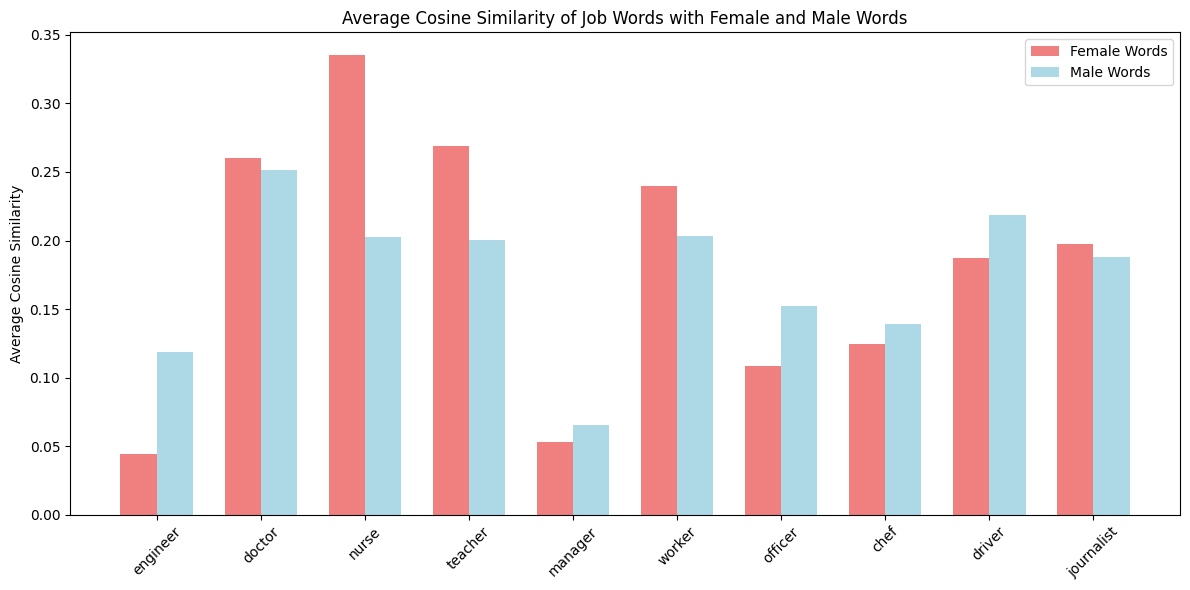

In [16]:
import matplotlib.pyplot as plt

# Bar graph visulaization
labels = job_words
female_vals = [female_similarities[job] for job in labels]
male_vals = [male_similarities[job] for job in labels]
width = 0.35
x = range(len(labels))

fig, ax = plt.subplots(figsize = (12,6))
rects1 = ax.bar(x, female_value, width, label='Female Words', color = 'lightcoral')
rects2 = ax.bar([i + width for i in x], male_value,width, label='Male Words', color = 'lightblue')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Cosine Similarity')
ax.set_title('Average Cosine Similarity of Job Words with Female and Male Words')
ax.set_xticks([i + width/2 for i in x])
ax.set_xticklabels(labels, rotation = 45)
ax.legend()

fig.tight_layout()
plt.show()